
# 04 - Backtesting
This notebook calculates the PnL of the strategy and evaluates performance metrics.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Load spread and signals
spread_df = pd.read_csv("../data/processed/spread.csv", index_col=0, parse_dates=True)
spread = spread_df.iloc[:, 0]  # take the first column as Series

signals = pd.read_csv("../data/processed/signals.csv", index_col=0, parse_dates=True)


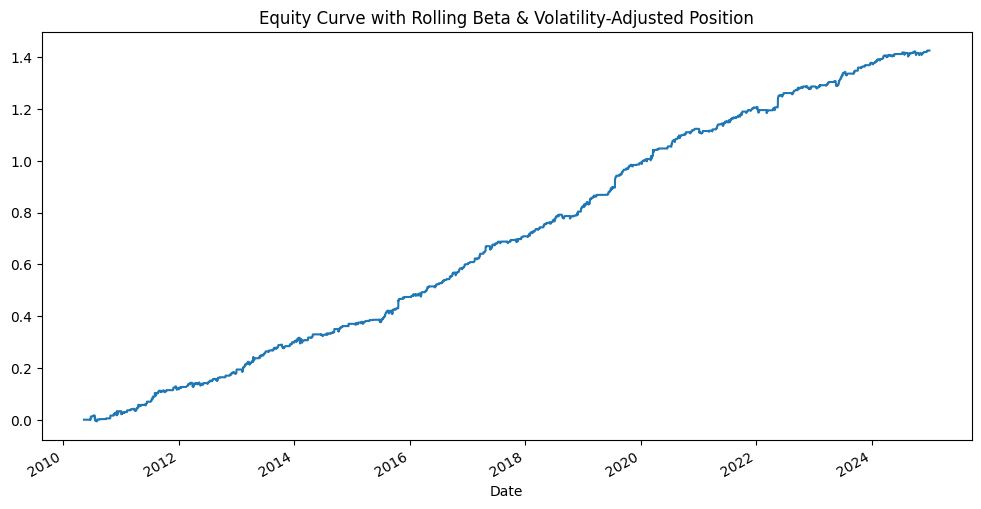

In [3]:

# Equity curve
equity = signals['pnl_tc'].cumsum()
equity.plot(figsize=(12,6), title="Equity Curve with Rolling Beta & Volatility-Adjusted Position")
plt.show()

In [4]:
# Performance metrics
def sharpe_ratio(returns, freq=252):
    return (returns.mean() / returns.std()) * np.sqrt(freq)

sharpe = sharpe_ratio(signals['pnl_tc'].dropna())
max_dd = (equity.cummax() - equity).max()

print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: {max_dd:.2f}")

Sharpe Ratio: 2.49
Max Drawdown: 0.02
